In [115]:
import statistics as st
import matplotlib.pyplot as plt
import random
import math

In [116]:
%matplotlib inline


In [117]:
def roll_die():
        return random.randint(1,6)

In [118]:
class Player:
    """
    Responsibilities:
    Keep track of score and number of rolls
    Determine if player should roll again based on current state
    Run through a complete turn
    
    stock player. rolls once and holds that score
    """
    
    def __init__(self):
        self.points = 0
        self.reset()
    
    def reset(self):
        self.points = 0
        self.rolls = 0
    
    

    #     def should_roll_again(self):
#         """
#         Returns True if the Player should roll again, False otherwise
#         This method should probably be overridden with subclasses to do more complex stuff!
#         """
#         return False
    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                return 0
                #break
            else:
                self.points += roll
            
                break

        return self.points

In [119]:
class PigSolitaireGame:
    """
    Responsibilities:
    Run a game
    Keep track of total points over 7 turns
    
    Collaborators:
    Player (or subclass)
    """
    def __init__(self, player):
        self.player = player
    
    def play_game(self):
        total_points = 0
        for _ in range(7):
            total_points += self.player.play_turn()
            
        return total_points

In [120]:
# class CautiousPlayer(Player):
#     # You only need to override the methods you want to change
#     # Including __init__ - if the superclass version is fine, don't override it!
#     def should_roll_again(self):
#         if self.rolls < 2:
#             return True
#         else:
#             return False

In [121]:
class OptimalPlayer(Player):
    """
    Responsibilities:
    based on Player class
    Optimal player per science paper
    rolls until has 25
    - 
    """
    
    def __init__(self):
        super().__init__()
    
    def reset(self):
        self.points = 0
        self.rolls = 0

    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                return 0
                #break
            else:
                self.points += roll
                if self.points < 24:
                    continue
                else:
                    break

        return self.points

In [122]:
class ConservativePlayer(Player):
    """
    Responsibilities:
    based on Player class
    Optimal player per science paper
    rolls until has 10
    - 
    """
    
    def __init__(self):
        super().__init__()
    
    def reset(self):
        self.points = 0
        self.rolls = 0

    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                return 0
                #break
            else:
                self.points += roll
                if self.points < 10:
                    continue
                else:
                    break

        return self.points



In [156]:
reg_trials = []
conserv_trials = []
optimal_trials = []

In [157]:
def play_scenarios(n):
    while n > 0:
        
        game = PigSolitaireGame(Player())
        reg_trials.append(game.play_game()) 
        #print(game.play_game())

        game = PigSolitaireGame(ConservativePlayer())
        conserv_trials.append(game.play_game())
        #print(game.play_game())

        game = PigSolitaireGame(OptimalPlayer())
        optimal_trials.append(game.play_game())
        #print(game.play_game())

        n -= 1
    

In [ ]:
play_scenarios(250000)

In [172]:
#mean1 = st.mean(optimal_trials)
#mean2 = st.mean(conserv_trials)
#mean3 = st.mean(reg_trials)
print("Regular Player: Only Rolls Once")
print("Conservative Player: Holds at 10 or more")
print("Optimal Player: Holds at 24 or more")
print("Trials:", len(reg_trials))
#print(len(conserv_trials))
#print(len(optimal_trials))
#print(reg_trials)
print('mean of regular:', st.mean(reg_trials))
print('mean of conservative:',st.mean(conserv_trials))
print('mean of optimal:',st.mean(optimal_trials))

print('min, max of regular:  {}, {}'.format(min(reg_trials), max(reg_trials)))
print('min, max of conservative:  {}, {}'.format(min(conserv_trials), max(conserv_trials)))
print('min, max of optimal:  {}, {}'.format(min(optimal_trials), max(optimal_trials)))


Regular Player: Only Rolls Once
Conservative Player: Holds at 10 or more
Optimal Player: Holds at 24 or more
Trials: 310010
mean of regular: 23.333918260701267
mean of conservative: 48.136714944679206
mean of optimal: 56.41178994225993
min, max of regular:  0, 42
min, max of conservative:  0, 97
min, max of optimal:  0, 190


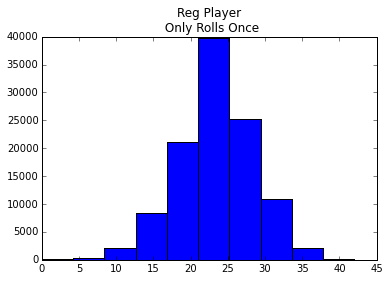

In [166]:
plt.hist(reg_trials)
plt.title("Reg Player \n Only Rolls Once")
plt.show()

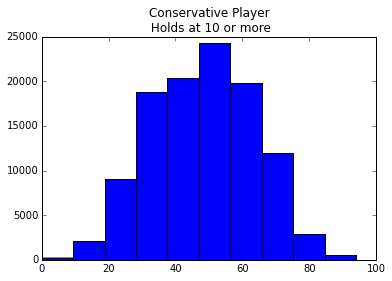

In [167]:
plt.hist(conserv_trials)
plt.title("Conservative Player \n Holds at 10 or more")
plt.show()

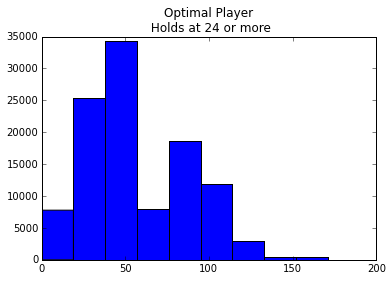

In [168]:
plt.hist(optimal_trials)
plt.title("Optimal Player \n Holds at 24 or more")
plt.show()